Normal Shock Relations
======================

**Course : ASE 3072**

**Prof. Jin Seok Park**

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Isentropic Relation
----------------------------
* 전온도비
  - $\frac{T_0}{T}=\left ( 1+ \frac{\gamma-1}{2} M^2 \right)$
  
* 전압력비
  - $\frac{P_0}{P}=\left ( 1+ \frac{\gamma-1}{2} M^2 \right)^\frac{\gamma}{\gamma-1}$
  
* 전밀도비
  - $\frac{\rho_0}{\rho}=\left ( 1+ \frac{\gamma-1}{2} M^2 \right)^\frac{1}{\gamma-1}$

In [ ]:
def t0_t(Mach, gamma=1.4):
    return 1 + (gamma-1)/2*Mach**2

def p0_p(Mach, gamma=1.4):
    return t0_t(Mach, gamma)**(gamma/(gamma-1))

def rho0_rho(Mach, gamma=1.4):
    return t0_t(Mach, gamma)**(1/(gamma-1))

In [ ]:
Mach = 0.2

p0_p(0.2), rho0_rho(0.2), t0_t(0.2)

(1.0282811211191059, 1.0201201598403828, 1.008)

Characteristic Mach number
-------------------------------------

In [ ]:
def mstar(Mach, gamma=1.4):
    return np.sqrt((gamma+1)*Mach**2 / (2+(gamma-1)*Mach**2))

Text(0, 0.5, '$M^*$')

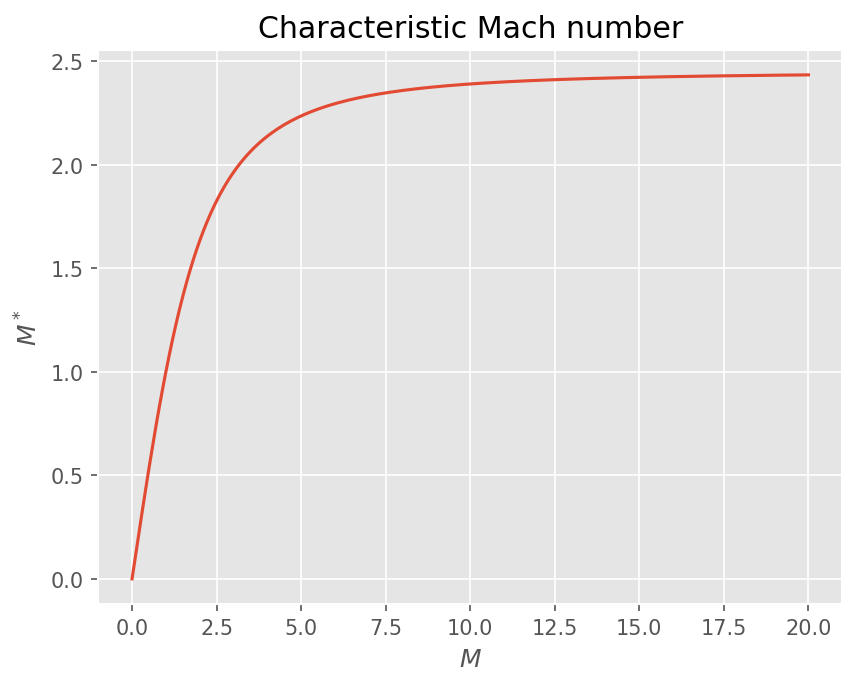

In [ ]:
mach = np.linspace(0, 20, 201)
mchar = mstar(mach)
fig, ax = plt.subplots()
ax.plot(mach, mchar)
ax.set_title('Characteristic Mach number')
ax.set_xlabel('$M$')
ax.set_ylabel('$M^*$')

In [ ]:
gamma = 1.4
np.sqrt((gamma+1) / (gamma-1))

2.4494897427831783

Example 8.8
-----------------
$M=3.5$, $p=0.3$atm, $T=180$K

In [ ]:
M=3.5
p = 0.3
T = 180

In [ ]:
p0 = p0_p(M)*p
T0 = t0_t(M)*T
print("Total Pressure : {:4f} atm".format(p0))
print("Total Temperature : {:4f} K".format(T0))

Total Pressure : 22.881689 atm
Total Temperature : 621.000000 K


In [ ]:
Tst = T0 / t0_t(1)
ast = np.sqrt(gamma*287*Tst)
print('Sonic Temperature : {:4f} K'.format(Tst))
print('Sonic speed of sound : {:4f} m/s'.format(ast))

Sonic Temperature : 517.500000 K
Sonic speed of sound : 455.995066 m/s


In [ ]:
u = M*np.sqrt(gamma*287*T)
Mst = u/ast
print('Characteristic Mach number : {:.4f}'.format(Mst))

Characteristic Mach number : 2.0642


Normal Shock Relation
----------------------------------
* Prandtl relation : $M_1^*M_2^*=1$

In [ ]:
def M2(M1, gamma=1.4):
    return np.sqrt((1 + (gamma-1)/2*M1**2)/(gamma*M1**2 - (gamma-1)/2))

In [ ]:
def rho2_rho1(M1, gamma=1.4):
    return (gamma+1)*M1**2/(2+(gamma-1)*M1**2)

In [ ]:
def p2_p1(M1, gamma=1.4):
    return 1 + 2*gamma/(gamma+1)*(M1**2-1)

In [ ]:
def t2_t1(M1, gamma=1.4):
    return p2_p1(M1, gamma)/rho2_rho1(M1, gamma)

In [ ]:
def p02_p01(M1,gamma=1.4):
    mach = M2(M1, gamma)
    p02 = p0_p(mach, gamma)*p2_p1(M1, gamma)
    p01 = p0_p(M1, gamma)
    return p02/p01

In [ ]:
def p02_p1(M1,gamma=1.4):
    mach = M2(M1, gamma)
    return p0_p(mach, gamma)*p2_p1(M1, gamma)

Text(0, 0.5, '$M_2$')

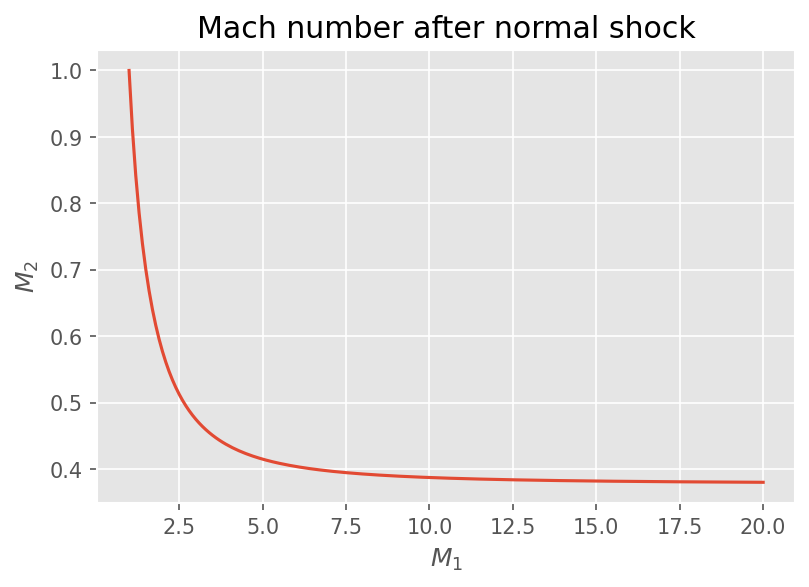

In [ ]:
mach1 = np.linspace(1, 20, 191)
mach2 = M2(mach1)
fig, ax = plt.subplots()
ax.plot(mach1, mach2)
ax.set_title('Mach number after normal shock')
ax.set_xlabel('$M_1$')
ax.set_ylabel('$M_2$')

Entropy change after normal shock
-----------------------------
$\Delta s=s_2-s_1=c_p \ln(\frac{T2}{T1}) - R \ln(\frac{p_2}{p_1})$

In [ ]:
gamma = 1.4
R = 287
cp = gamma / (gamma -1)*R

def ds(M1, gamma=1.4):
    return cp*np.log(t2_t1(M1, gamma)) - R*np.log(p2_p1(M1,gamma))

Text(0, 0.5, '$\\Delta s$')

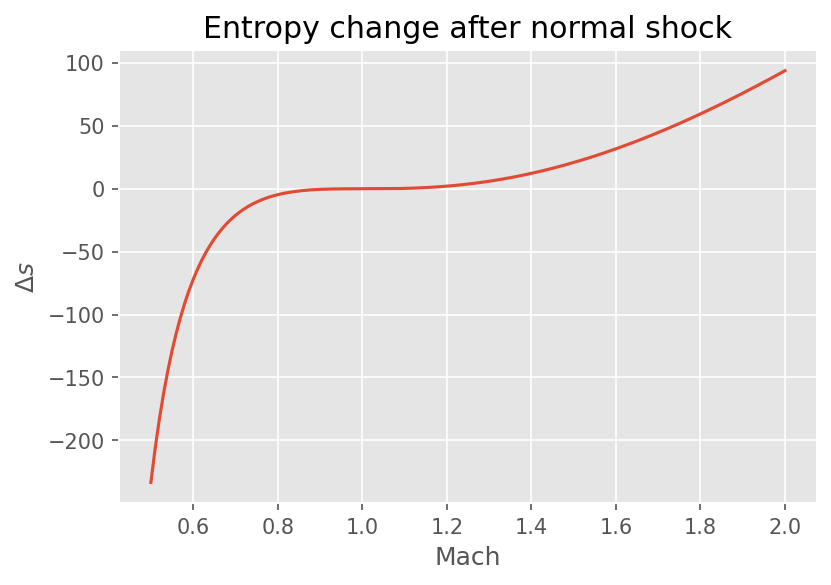

In [ ]:
M1 = np.linspace(0.5, 2.0, 151)
fig, ax = plt.subplots()
ax.plot(M1, ds(M1))
ax.set_title('Entropy change after normal shock')
ax.set_xlabel('Mach')
ax.set_ylabel('$\Delta s$')

Example 8.18
--------------------
$T_1=300K$, $u_1=1215m/s$

In [ ]:
t1 = 300
u1 = 1215
a1 = np.sqrt(1.4*287*300)
print('a1={:.2f} m/s'.format(a1))
M1 = u1/a1
print('M1={:.2f}'.format(M1))
mach2 = M2(M1)
print('M2={:.4f}'.format(mach2))
t2 = t2_t1(M1)*t1
print('T2={:.2f}'.format(t2))
a2 = np.sqrt(1.4*287*t2)
print('a2={:.2f} m/s'.format(a2))
u2 = mach2*a2
print('u2={:.2f} m/s'.format(u2))

a1=347.19 m/s
M1=3.50
M2=0.4512
T2=994.33
a2=632.08 m/s
u2=285.17 m/s


Pitot tube
----------------
* subsonic : $M_1^2=\frac{2}{\gamma-1} \left [ (\frac{p_0}{p})^\frac{\gamma-1}{\gamma} - 1 \right ]$
* supersonic : $\frac{p_{0,2}}{p_1}$

at M=1, p0=1.893p


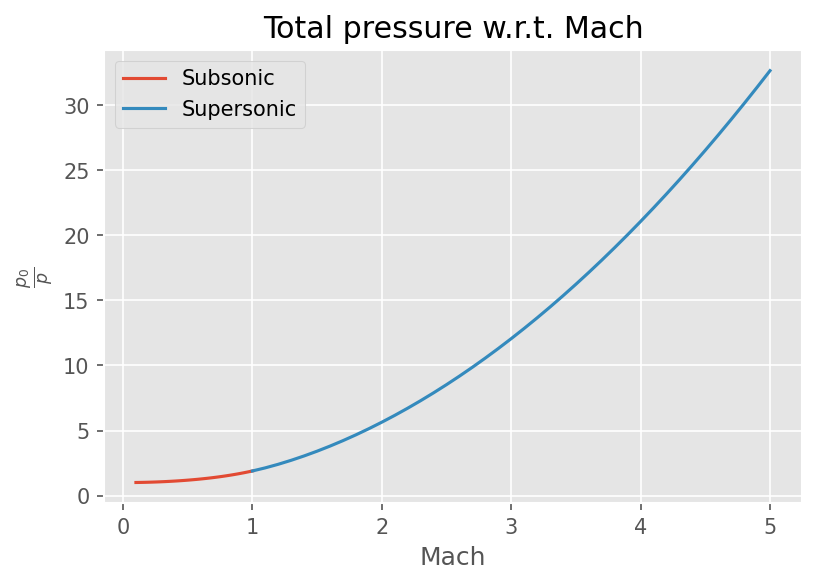

In [ ]:
mach11 = np.linspace(0.1, 1, 91)
p01 = p0_p(mach11)
mach12 = np.linspace(1, 5, 41)
p02 = p02_p1(mach12)
fig, ax = plt.subplots()
ax.plot(mach11, p01)
ax.plot(mach12, p02)
ax.set_title('Total pressure w.r.t. Mach')
ax.set_xlabel('Mach')
ax.set_ylabel(r'$\frac{p_0}{p}$')
ax.legend(['Subsonic', 'Supersonic'])
print('at M=1, p0={:.3f}p'.format(p01[-1]))

Example 8.22
------------------

In [ ]:
from scipy.optimize import newton

def subsonic_p0_mach(p0, gamma=1.4):
    return np.sqrt(2/(gamma-1)*(p0**((gamma-1)/gamma)-1))

def supersonic_p0_mach(p0, gamma=1.4):
    func = lambda x: p02_p1(x, gamma) - p0
    return newton(func, 1.01)

In [ ]:
p0 = 1.276
mach = subsonic_p0_mach(p0)
print('When p0 = {} atm, Mach = {:.3f}'.format(p0, mach))

When p0 = 1.276 atm, Mach = 0.600


In [ ]:
p0 = 2.714
mach = supersonic_p0_mach(p0)
print('When p0 = {} atm, Mach = {:.3f}'.format(p0, mach))

When p0 = 2.714 atm, Mach = 1.300


In [ ]:
p0 = 12.06
mach = supersonic_p0_mach(p0)
print('When p0 = {} atm, Mach = {:.3f}'.format(p0, mach))

When p0 = 12.06 atm, Mach = 3.000


Example 8.24
-------------

In [ ]:
p =2.5273e3
t = 216.66
p0 = 3.88e4
p0ratio = p0 / p
print('P0 over p = {:.3f}'.format(p0ratio))

P0 over p = 15.352


In [ ]:
mach = supersonic_p0_mach(p0ratio)
print('When p0 / p = {:.3f}, Mach = {:.3f}'.format(p0ratio, mach))

When p0 / p = 15.352, Mach = 3.400


In [ ]:
v = np.sqrt(1.4*287*t)*mach
print('Velocity = {:4f} m/s'.format(v))

Velocity = 1003.105888 m/s
